Question 1 Using the sales.csv Download sales.csv, write code to show effects of interactions, if any, on the linear regression model to predict the total_sales for a new area using given sales from three areas

In [97]:
 pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 14.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3
Note: you may need to restart the kernel to use updated packages.


In [3]:
##importbox
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import PolynomialFeatures

In [79]:
##reading and describing the data
interaction = 'off' ##we can turn this off to avoid interaction effects
q1 = pd.read_csv('sales.csv')
q1.describe()

,Unnamed: 0,area1_sales,area2_sales,area3_sales,total_sales
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2499.500000,0.455067,0.115893,0.085187,0.909147
std,866.169729,0.296090,0.251816,0.091396,0.344035
min,1000.000000,0.000000,0.000000,0.000000,0.490000
25%,1749.750000,0.260000,0.000000,0.040000,0.610000
50%,2499.500000,0.420000,0.000000,0.070000,0.810000
75%,3249.250000,0.610000,0.080000,0.110000,1.150000
max,3999.000000,1.690000,1.710000,1.230000,1.750000


In [82]:
##using the scikitLearn LR module, we model the following:
def modelo():
    if interaction == 'off':
        model1 = smf.ols(formula='total_sales ~ area1_sales + area2_sales + area3_sales', data=q1) ##fitting the model with data in hand
        model_result1=model1.fit()
        print(model_result1.summary()) ##printing out the model details
        fit1 = pd.DataFrame(np.random.random((3000,1)))  ##making a randomized column for new area sales
        ext = q1[['area1_sales','area2_sales']] ##taking out area sales for 2 of the 3 columns
        fit1 = fit1.join(ext) ##joining the 2 to the new randomized area sales column
        fit1.columns = ['area1_sales','area2_sales','area3_sales'] ##using new dataframe, without interaction effects
        ans1 = pd.DataFrame(model_result1.predict(fit1)) #we will run predictions from the model
        print("Prediction for new area is:")
        print(ans1)
    elif interaction == 'on':
        model1 = smf.ols(formula='total_sales ~ area1_sales + area2_sales + area3_sales + area1_sales*area2_sales + area2_sales*area3_sales + area3_sales*area1_sales', data=q1) ##fitting the model with data in hand
        model_result1=model1.fit()
        print(model_result1.summary()) ##printing out the model details
        fit1 = pd.DataFrame(np.random.random((3000,1)))
        ext = q1[['area1_sales','area2_sales']]
        fit1 = fit1.join(ext)
        fit1.columns = ['area1_sales','area2_sales','area3_sales'] ##using new dataframe, without interaction effects
        ans1 = pd.DataFrame(model_result1.predict(fit1))
        print("Prediction for new area is:")
        print(ans1)
    else:
        print("something's up, go home!")


We now need to fit an area4 sales into this model and see predicted probabilities, from area sales for 1,2 & 3 we know that the max sales is 1.71 and min sales is 0, so we used a randomized function that generated values between 0 & 1

In [83]:
if __name__ == '__main__':
    modelo()


                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2354.
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:03:30   Log-Likelihood:                 761.25
No. Observations:                3000   AIC:                            -1515.
Df Residuals:                    2996   BIC:                            -1490.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2601      0.008     30.743      

Question 2: Develop a full Logistic Regression Model using customer.csv Download customer.csvto predict whether the customer will purchase the product. Also train trimmed logistic regression models (Trimmed over features in the data). Compute the "in-sample R2" (pseudo) for the models you train and compare the models based on this metric.

In [12]:
q2 = pd.read_csv('customer.csv') ##reading the file
q2_g = pd.get_dummies(q2["Gender"]) ##turning gender into two dummy variables
q2_g = q2_g.drop(["Male"], axis=1) ##taking the male gender out of the dataframe *sigh, they had to go*
q2 = pd.concat((q2,q2_g), axis = 1) ##concatenating our new female dummy variable
q2 = q2.drop(["Gender"],axis=1) ##dropping the old naming system
q2 = q2.rename(columns={"Female": "Gender"}) ##swapping out the column name to bring back gender
print(q2)

      User ID  Age  EstimatedSalary  Purchased  Gender
0    15624510   19            19000          0       0
1    15810944   35            20000          0       0
2    15668575   26            43000          0       1
3    15603246   27            57000          0       1
4    15804002   19            76000          0       0
..        ...  ...              ...        ...     ...
395  15691863   46            41000          1       1
396  15706071   51            23000          1       0
397  15654296   50            20000          1       1
398  15755018   36            33000          0       0
399  15594041   49            36000          1       1

[400 rows x 5 columns]


In [22]:
#poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
#q2_int = pd.DataFrame(poly.fit_transform(q2))
#q2_new = pd.DataFrame(np.hstack((q2, q2_int)))
#q2_new

#tried to implement interaction using polynomial features, failed miserably

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,15624510.0,19.0,19000.0,0.0,0.0,15624510.0,19.0,19000.0,0.0,0.0,296865690.0,2.968657e+11,0.0,0.0,361000.0,0.0,0.0,0.0,0.0,0.0
1,15810944.0,35.0,20000.0,0.0,0.0,15810944.0,35.0,20000.0,0.0,0.0,553383040.0,3.162189e+11,0.0,0.0,700000.0,0.0,0.0,0.0,0.0,0.0
2,15668575.0,26.0,43000.0,0.0,1.0,15668575.0,26.0,43000.0,0.0,1.0,407382950.0,6.737487e+11,0.0,15668575.0,1118000.0,0.0,26.0,0.0,43000.0,0.0
3,15603246.0,27.0,57000.0,0.0,1.0,15603246.0,27.0,57000.0,0.0,1.0,421287642.0,8.893850e+11,0.0,15603246.0,1539000.0,0.0,27.0,0.0,57000.0,0.0
4,15804002.0,19.0,76000.0,0.0,0.0,15804002.0,19.0,76000.0,0.0,0.0,300276038.0,1.201104e+12,0.0,0.0,1444000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,15691863.0,46.0,41000.0,1.0,1.0,15691863.0,46.0,41000.0,1.0,1.0,721825698.0,6.433664e+11,15691863.0,15691863.0,1886000.0,46.0,46.0,41000.0,41000.0,1.0
396,15706071.0,51.0,23000.0,1.0,0.0,15706071.0,51.0,23000.0,1.0,0.0,801009621.0,3.612396e+11,15706071.0,0.0,1173000.0,51.0,0.0,23000.0,0.0,0.0
397,15654296.0,50.0,20000.0,1.0,1.0,15654296.0,50.0,20000.0,1.0,1.0,782714800.0,3.130859e+11,15654296.0,15654296.0,1000000.0,50.0,50.0,20000.0,20000.0,1.0
398,15755018.0,36.0,33000.0,0.0,0.0,15755018.0,36.0,33000.0,0.0,0.0,567180648.0,5.199156e+11,0.0,0.0,1188000.0,0.0,0.0,0.0,0.0,0.0


MODEL1: LL(PURCHASED) ~ INTERCEPT + GENDER(DUMMY) + SALARY + AGE

In [63]:


#DataFrame1
q2_X = q2.loc[:,('Gender','EstimatedSalary','Age')]

#Adding intercept term to regressors
q2_X = sm.add_constant(q2_X) 
q2_Y = q2.loc[:,'Purchased'] #taking out the target


#LOGIT IT!
log_reg_1 = sm.Logit(q2_Y, q2_X).fit()
print(log_reg_1.summary())

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.4711
Time:                        21:49:15   Log-Likelihood:                -137.92
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 5.488e-53
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.4498      1.309     -9.510      0.000     -15.016      -9.884
Gender        

MODEL 2 : LL(Purchased) ~ INTERCEPT + GENDER + SALARY + AGE + GENDER:SALARY + GENDER:AGE + SALARY:AGE

In [49]:
##Hardcoding all the interaction terms
Xi = q2_X.copy() 
Xi['Gender_Salary'] = Xi['Gender']*Xi['EstimatedSalary']  
Xi['Gender_Age'] = Xi['Gender']*Xi['Age']
Xi['Salary_Age'] = Xi['EstimatedSalary']*Xi['Age']

In [48]:
#Fitting that logit model
log_reg_2 = sm.Logit(q2_Y, Xi).fit()

#LOGIT IT!
print(log_reg_2.summary())

Optimization terminated successfully.
         Current function value: 0.262888
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            6
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.5968
Time:                        21:33:15   Log-Likelihood:                -105.16
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 3.155e-64
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -37.6404      4.771     -7.890      0.000     -46.991     -28.290
Gender        

There is significant increase in Psuedo R-squared value, R-squared values out of sample will not provide us any inferences. With the addition of interaction terms there is a 12% increase in R-squared

TRIM MODEL 1 - LL(PURCHASED) ~ SALARY

In [53]:
q2_X1 = q2.loc[:,('EstimatedSalary')] #DataFrame customer_X1

# Fit the logistic regression model
log_reg_T1 = sm.Logit(q2_Y, q2_X1).fit()

# Print the summary of the model
print(log_reg_T1.summary())

Optimization terminated successfully.
         Current function value: 0.687740
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      399
Method:                           MLE   Df Model:                            0
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                -0.05487
Time:                        21:34:51   Log-Likelihood:                -275.10
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                       nan
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
EstimatedSalary -2.693e-06    1.3e-06     -2.069      0.038   -5.24e-06   -1.43e-07


TRIM MODEL 2 - LL(PURCHASED) ~ INTERCEPT + SALARY

In [36]:
q2_X2 = sm.add_constant(q2_X1)

#Fitting and Printing
log_reg_T2 = sm.Logit(q2_Y, q2_X2).fit()
print(log_reg_T2.summary())

Optimization terminated successfully.
         Current function value: 0.584658
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.1032
Time:                        21:01:03   Log-Likelihood:                -233.86
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 2.168e-13
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.3227      0.286     -8.134      0.000      -2.882      -1.763
EstimatedSalar

TRIM MODEL 3 - LL(PURCHASED) ~ AGE

In [37]:
q2_X3 = q2.loc[:,('Age')]


#Fitting and Printing
log_reg_T3 = sm.Logit(q2_Y, q2_X3).fit()
print(log_reg_T3.summary())

Optimization terminated successfully.
         Current function value: 0.686544
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      399
Method:                           MLE   Df Model:                            0
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                -0.05304
Time:                        21:01:42   Log-Likelihood:                -274.62
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0059      0.003     -2.289      0.022      -0.011      -0.001


TRIM MODEL 4 - LL(PURCHASED) ~ INTERCEPT + AGE

In [54]:
q2_X4 = sm.add_constant(q2_X3)


# Fitting and Printing
log_reg_T4 = sm.Logit(q2_Y, q2_X4).fit()
print(log_reg_T4.summary())

Optimization terminated successfully.
         Current function value: 0.420327
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.3553
Time:                        21:37:56   Log-Likelihood:                -168.13
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 3.356e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0441      0.784    -10.258      0.000      -9.581      -6.507
Age            0.1889      0.

TRIM MODEL 5 - LL(PURCHASED) ~ SALARY + AGE

In [57]:
q2_X5 = q2.loc[:,('EstimatedSalary','Age')]

log_reg_T5 = sm.Logit(q2_Y, q2_X5).fit()
print(log_reg_T5.summary())

Optimization terminated successfully.
         Current function value: 0.686532
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                -0.05302
Time:                        21:40:43   Log-Likelihood:                -274.61
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                     1.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
EstimatedSalary -2.782e-07   2.78e-06     -0.100      0.920   -5.72e-06    5.16e-06
Age           

TRIM MODEL 6 - LL(PURCHASED) ~ INTERCEPT + SALARY + AGE

In [59]:
q2_X6 = sm.add_constant(q2_X5)

log_reg_T6 = sm.Logit(q2_Y, q2_X6).fit()
print(log_reg_T6.summary())

Optimization terminated successfully.
         Current function value: 0.346314
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.4688
Time:                        21:45:28   Log-Likelihood:                -138.53
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 7.995e-54
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.4340      1.300     -9.566      0.000     -14.982      -9.886
EstimatedSalar

TRIM MODEL 7 - LL(PURCHASED) ~ SALARY + AGE + AGE:SALARY

In [62]:
q2_X6i = q2_X6.copy()

q2_X6i['Age_ESalary'] = q2_X6i['EstimatedSalary']*q2_X6i['Age']

# Fit the logistic regression model
log_reg_T7 = sm.Logit(q2_Y, q2_X6i).fit()

# Print the summary of the model
print(log_reg_T7.summary())

Optimization terminated successfully.
         Current function value: 0.266962
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.5905
Time:                        21:48:50   Log-Likelihood:                -106.78
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 1.843e-66
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -36.1099      4.419     -8.172      0.000     -44.770     -27.449
EstimatedSalar

Model 2 has the highest R-squared value of 0.59, therefore the suggestion would be to use this model for any logistic regression

In [65]:
print(log_reg_2.summary())

                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            6
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.5968
Time:                        21:49:41   Log-Likelihood:                -105.16
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 3.155e-64
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -37.6404      4.771     -7.890      0.000     -46.991     -28.290
Gender              0.6031      2.572      0.234      0.815      -4.438       5.644
EstimatedSalary     0.0003   4.4

In [66]:
# Make predictions using the logistic regression model
y_pred = log_reg_2.predict(Xi)

# Convert the predicted probabilities to binary labels
y_pred = [1 if p > 0.5 else 0 for p in y_pred]

# Generate the classification report
report = classification_report(q2_Y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       257
           1       0.83      0.85      0.84       143

    accuracy                           0.89       400
   macro avg       0.87      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



Q3. For the Logistic Regression models trained above, pick the best model wrt to the in-sample R2 and give your interpretation of the model’s coefficients (For example, what effect does a positive or negative coefficient have on the model and so on).


The constant coefficient is the value of the log-odds when all predictor variables are equal to zero, this term is also the garbage collector of the equation.

The Gender coefficient is the change in log-odds of the outcome variable for a one unit increase in Gender, holding all other predictor variables constant. The p-value is greater than 0.05, this variable is not statistically significant. 

The EstimatedSalary coefficient is the change in log-odds of the outcome variable for a one unit increase in EstimatedSalary, holding all other predictor variables constant. The p-value is less than 0.05, it's statistically significant.

The Age coefficient is the change in log-odds of the outcome variable for a one unit increase in Age, holding all other predictor variables constant. The p-value is less than 0.05, it's statistically significant in predicting the outcome.

The Gender_Salary & Gender_Age coefficients are very small and statistically insignificant

The Salary_Age coefficient is the change in log-odds of the outcome variable for one unit increase in the interaction term between Salary and Age, holding all other predictor variables constant. The p-value is less than 0.05, which suggests that this variable is statistically significant in predicting the outcome.

59.68% of the variance in the outcome variable is explained by the predictor variables.

Q4. Is accuracy a good metric to judge the above model? Give reasons and alternatives to support your answer.

Accuracy is a commonly used metric to evaluate the performance of a classification model, but it may not always be the best metric to evaluate the performance of a logistic regression model, particularly when the class distribution is imbalanced.

F1 score, is a better metric, it takes all the other values in the classification matrix into consideration anmd provides a score for efficacy of the model. This is slightly better than using accuracy to justify if a model is good or bad. Sometimes, the threshold also may not be set at the optimum level and for this we use a method called threshold moving on the ROC curve.

Another problem, my practicum team currently faces is the highly imbalanced data set, when the model learns from an imbalanced data set, it's prediction accuracy may be good, but it might not prove to be a very potent model. We want a wide range of data for the model to train on. Sometimes we can use methods like SMOTE to solve for the imbalance, but it's creating synthetic points and not really adding too much value. 

Q5. Plot the interactions of the ‘Age’ and ‘Gender’ features with the ‘Purchased’ output. 

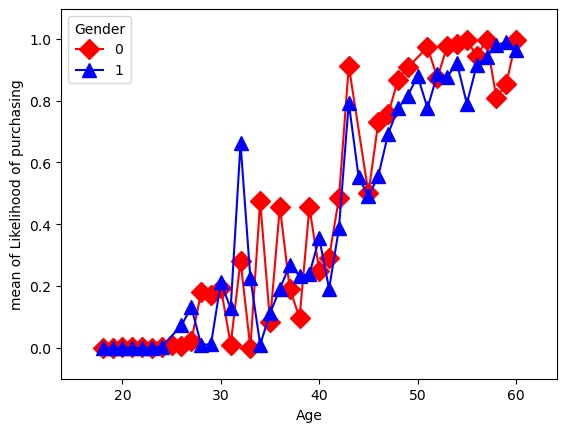

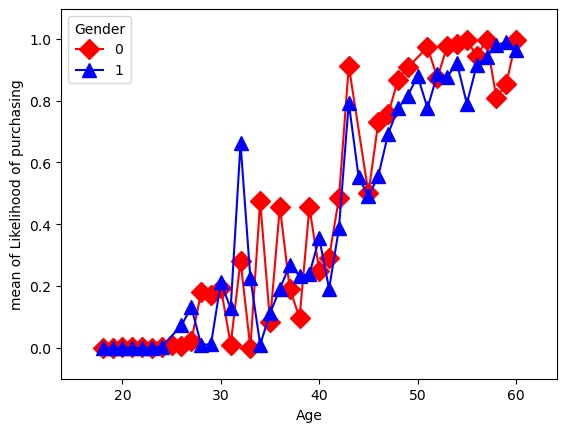

In [67]:
purchased_pred = log_reg_2.predict(Xi)

##using the statsmodel interaction plot
interaction_plot(q2.Age, q2.Gender, purchased_pred,
                 xlabel='Age', ylabel='Likelihood of purchasing',
                 colors=['red', 'blue'], markers=['D', '^'], ms=10)
##we also used the ROC curve and a threshold moving method to identify optimum threshold in my practicum project, it would be a little out of scope for this assignment



Q6. The following plots show effect of Income and Change in savings on Likelihood of buying a house. Observe the three plots (a, b, c) shown and answer the following questions for each plot:
Should the regression equation include the interaction terms (interaction between Income and Average Savings) or not?
Give your reasoning as to why or why shouldn’t they be included.

Plot (a) shows the relationship between Income and the likelihood of buying a house, with the average savings held constant. Plot (b) shows the relationship between the change in savings and the likelihood of buying a house, with income held constant. Plot (c) shows the relationship between income, the change in savings and the likelihood of buying a house, with the interaction term between income and the change in savings.

Plot (a) shows the relationship between savings and purchase likelihood with income held constant. 
Plot (b) shows the relationship between change in savings and purchase likelihood with income held constant
Plot (c) shows the relationship between income, change in savings and purchase likelihood with interaction term between income and change in savings

The plots (b) & (c) make a strong case to include interaction term between Income and Change in savings.


In plot (a), it can be observed that as income increases, the likelihood of buying a house also increases, but the effect of income on the likelihood of buying a house seems to be different for different values of the change in savings. It would not be good to add the Income:Savings interaction term as it seems like a step function at best.

In plot (b), it can be observed that as the change in savings increases, the likelihood of buying a house also increases, but the effect of change in savings on the likelihood of buying a house seems to be different for different values of income. There is a clear indication of an interaction effect in this case. We should consider including the Savings:Income interaction term.

In plot (c) it can be observed that the effect of income and change in savings on the likelihood of buying a house are not independent of each other. The effect of income and change in savings on the likelihood of buying a house seem to be dependent on each other, this suggests that there is a interaction effect between Income and change in savings on the likelihood of buying a house.We should include the interaction term in this case as there is sufficient indication.

Therefore, including the interaction term in the regression equation would capture the non-linear relationship between Income, change in savings and the likelihood of buying a house, and would lead to a more accurate model.